# Análisis del contenido de Netflix

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/home/netflix_dataset.csv')

df.head(3)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...


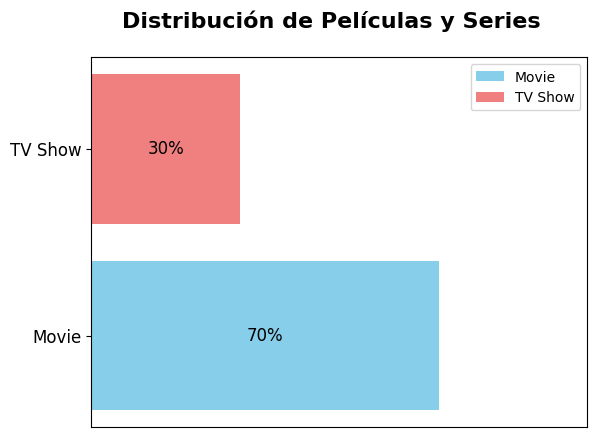

In [3]:
cuenta_por_tipo = df['type'].value_counts(normalize=True).round(2)

fig, ax = plt.subplots()

colores = {'Movie': 'skyblue', 'TV Show': 'lightcoral'}
bar_width = 0.5

for i, (tipo, porcentaje) in enumerate(cuenta_por_tipo.items()):
    ax.barh(i, porcentaje, color=colores[tipo], label=tipo)

    ax.text(porcentaje / 2, i, f"{int(porcentaje * 100)}%", ha='center', va='center',
            fontsize=12, fontweight='light', color='black')

ax.set_xlim(0, 1)
ax.set_xticks([])
ax.set_yticks(range(len(cuenta_por_tipo)))
ax.set_yticklabels(cuenta_por_tipo.index, fontsize=12, fontweight='light', color='black')

fig.suptitle('Distribución de Películas y Series', fontsize=16, fontweight='bold')

ax.legend()

plt.show()

La forma más sencilla de analizar el contenido de Netflix es mediante una división entre la cantidad de películas y series que ofrece la plataforma. El resultado es que hay dos veces y media más de películas que de series. Esto también nos dice que es prácticamente seguro que habrán más horas de reproducción de series que de películas, ya que una serie suele tener 5 veces más de horas de grabación que una película.

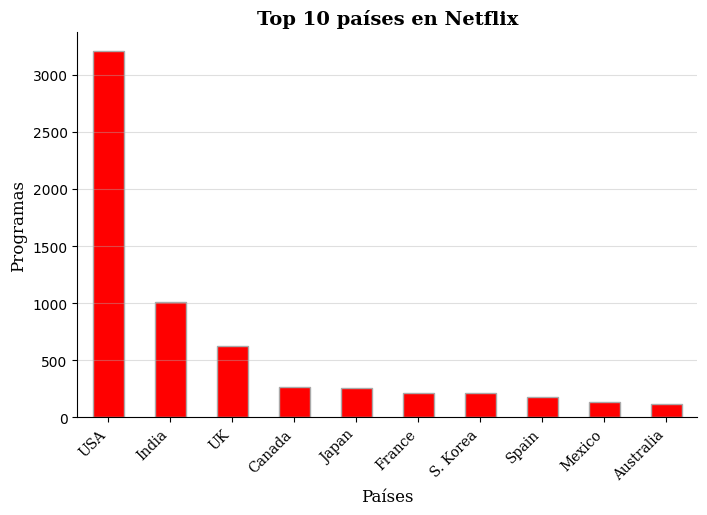

In [13]:
df['cuenta'] = 1

df['primer_pais'] = df['country'].str.split(",").str[0]
df['edades'] = df['rating'].replace({'TV-PG': 'Niños Mayores', 'TV-MA': 'Adultos', 'TV-Y7-FV': 'Niños Mayores',
                                         'TV-Y7': 'Niños Mayores', 'TV-14': 'Adolescentes', 'R': 'Adultos',
                                         'TV-Y': 'Niños', 'NR': 'Adultos', 'PG-13': 'Adolescentes', 'TV-G': 'Niños',
                                         'PG': 'Niños Mayores', 'G': 'Niños', 'UR': 'Adultos', 'NC-17': 'Adultos'})
df['primer_pais'].replace({'United States': 'USA', 'United Kingdom': 'UK', 'South Korea': 'S. Korea'}, inplace=True)

datos = df.groupby('primer_pais')['cuenta'].sum().nlargest(10).dropna()

fig, ax = plt.subplots(figsize=(8, 5))
datos.plot(kind='bar', color='Red', edgecolor='darkgray', ax=ax)

ax.set_xticklabels(datos.index, fontfamily='serif', rotation=45, ha='right')
ax.set_title('Top 10 países en Netflix', fontsize=14, fontweight='bold', fontfamily='serif')
ax.set_xlabel('Países', fontsize=12, fontweight='light', fontfamily='serif')
ax.set_ylabel('Programas', fontsize=12, fontweight='light', fontfamily='serif')
ax.spines[['top', 'right']].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

plt.show()


Ahora podemos ver cuáles son los países que crean un mayor número de programas para Netflix. Obviamente, en primer lugar está Estados Unidos, debido a que es el principal productor de películas y series a nivel mundial, con los estudios de Hollywood. Después de este se encuentra la India, que tiene un mercado local muy potente con la industria conocida como Bollywood, centrada en Bombai. En tercer y cuarto lugar se encuentran Canadá y Reino Unido, que tienen una influencia muy grande del cine de Estados Unidos al compartir idioma con este, y sus industrias suelen compartir actores, directores y equipos, lo que les hace aumentar en importancia.

<ipython-input-12-f72ddfaf67e6>:15: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(datos_q2q3_ratio.index, fontfamily='serif', fontsize=11)


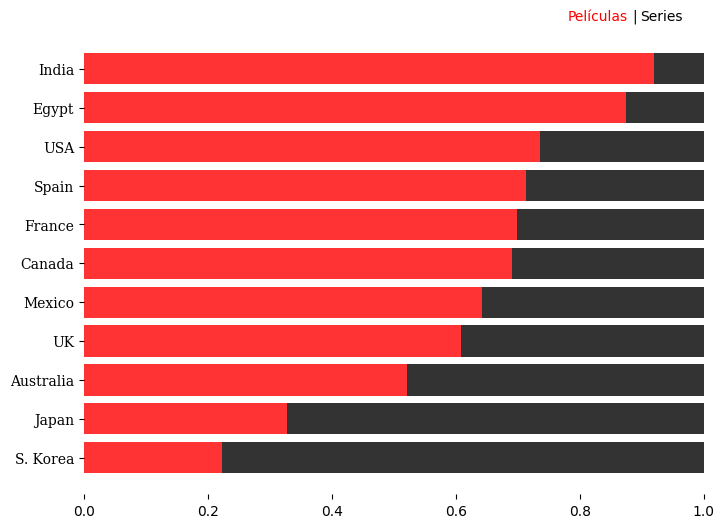

In [12]:
orden_pais = df['primer_pais'].value_counts()[:11].index

datos_q2q3 = df[['type', 'primer_pais']].groupby('primer_pais')['type'].value_counts().unstack().loc[orden_pais]

datos_q2q3['sum'] = datos_q2q3.sum(axis=1)

datos_q2q3_ratio = (datos_q2q3.T / datos_q2q3['sum']).T[['Movie', 'TV Show']].sort_values(by='Movie', ascending=False)[::-1]

fig, ax = plt.subplots(figsize=(8, 6))

ax.barh(datos_q2q3_ratio.index, datos_q2q3_ratio['Movie'], color='red', alpha=0.8, label='Películas')
ax.barh(datos_q2q3_ratio.index, datos_q2q3_ratio['TV Show'], left=datos_q2q3_ratio['Movie'], color='black', alpha=0.8, label='Series')

ax.set_xlim(0, 1)
ax.set_yticklabels(datos_q2q3_ratio.index, fontfamily='serif', fontsize=11)

fig.text(0.73, 0.9, "Películas", color='red')
fig.text(0.81, 0.9, "|", color='black')
fig.text(0.82, 0.9, "Series", color='black')

ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.axvline(x=1, color='black', linestyle='--', linewidth=0.5)

ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()


En países como en la India, la industria se basa principalmente en la realización de películas. Por otra parte, en el cine asíatico oriental la mayoría de las producciones en Netflix son de series.
